### Data exploration and viz of Find it Fix It requests to the City of Seattle (from a FOI request)

In [64]:
#getting and working with data
import pandas as pd
import numpy as np
import math
import re
import os
import datetime as dt
import string

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("poster")
#sns.set_style("dark")
sns.set_style("ticks")
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [51]:
#path for FIFI cleaned and preprocessed data frame
path = 'C:/Users/Schindler/Documents/ProgrammingFun/FIFI/cleaned_data.pkl'

In [52]:
#read in pkl file containing 
data = pd.read_pickle(path)
data = pd.DataFrame(data = data)
data.reset_index(inplace=True, drop=True)

print('Original data shape:\n', data.shape, '\n')
print('Original data columns:\n', data.columns.values, '\n')

#how much missing data is there?
print('Original data missing value counts:\n', data.isnull().sum(), '\n')
#what is the data type of each column?
print('Original data data types:\n', data.info(), '\n')

Original data shape:
 (202702, 35) 

Original data columns:
 ['Service Request Number' 'Created Date' 'Location' 'Location Details'
 'Description' 'License Number' 'State' 'Vehicle Make' 'Vehicle Color'
 'Length of Time Parked' 'Photo' 'FIFI_category' 'Location Details.1'
 'Causing property damage?' 'Current Issue' 'Type of animal'
 'On private property?' 'What is the Graffiti on?'
 'Location and Description' 'Obscene, racial, or hateful?'
 'Cross street or intersection?' 'Where?' 'Type of item?'
 'Where is the vegetation growing' 'Vegetation Safety Issue'
 'Parking Violation Concerning' 'License Plate Number' 'Location details'
 '7 digit number on pole' 'Issue' 'year' 'month' 'date' 'zip'
 'neighborhood'] 

Original data missing value counts:
 Service Request Number                  0
Created Date                            0
Location                                0
Location Details                      530
Description                         17477
License Number                     

In [53]:
data.head(1)

Service Request Number        Created Date                           Location                                   Location Details                                        Description License Number State   Vehicle Make Vehicle Color Length of Time Parked                                              Photo FIFI_category Location Details.1  Causing property damage?  Current Issue  Type of animal  On private property? What is the Graffiti on? Location and Description Obscene, racial, or hateful? Cross street or intersection? Where? Type of item?  Where is the vegetation growing  Vegetation Safety Issue Parking Violation Concerning License Plate Number Location details  7 digit number on pole Issue  year  month        date    zip     neighborhood
0            16-00000050 2016-01-01 10:17:27  5900 34TH CT S, SEATTLE, WA 98118  5900 34TH CT S; XY: 1280854.342623405, 203954....  Gold car, appears to have a window that won't ...        065-XVB    WA  Mercedes-Benz         Other          Over 1 month  http://servicerequest.seattle.gov/media/seattl...  Abnd_Vehicle                NaN                       NaN            NaN             NaN                   NaN                      NaN                      NaN                          NaN                           NaN    NaN           NaN                              NaN                      NaN                          NaN                  NaN              NaN                     NaN   NaN  2016      1  2016-01-01  98118  ColCity/SewardP

In [11]:
#vehicles with WA license plate or not
#use percent change from 2016 (as baseline) and then look at change over time, do by month (is it seasonal)
#commercial vs residential

In [54]:
#create list of FIFI cats ordered by request count to use for ordering of x axis on graphs
cat_order = data['FIFI_category'].value_counts().index.values

#create list of neighborhoods ordered by request count to use for ordering of x axis on graphs
neigh_order = data['neighborhood'].value_counts().index.values


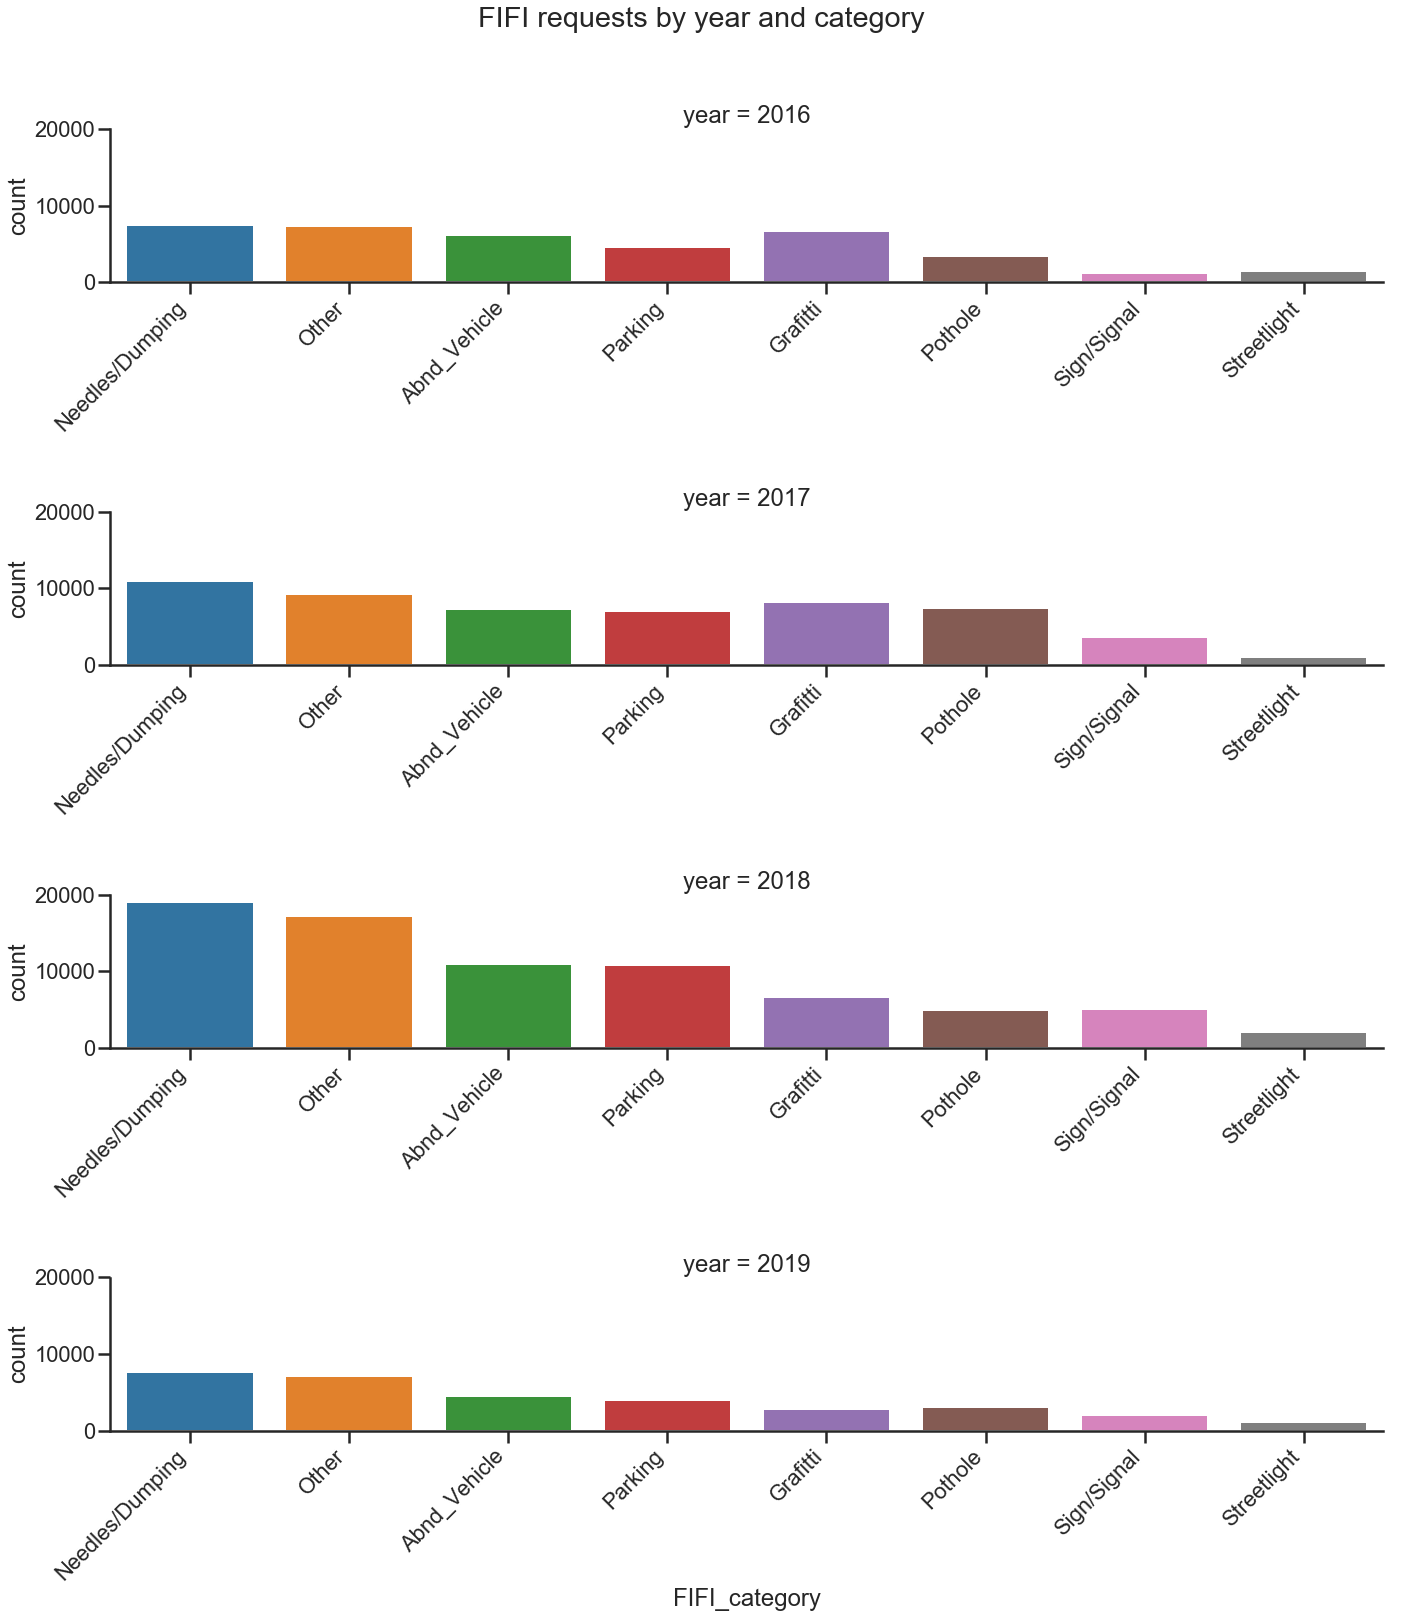

In [55]:
#create and viz number of FIFI requests by year and category
year_cat_count = data.groupby(['year', 'FIFI_category'])['FIFI_category'].count().reset_index(name='count')

g = sns.catplot(x='FIFI_category', data=year_cat_count, y='count', kind='bar', ci=68, height=5, aspect=4, \
                col='year', col_wrap=1, sharex=False, order=cat_order)

g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle('FIFI requests by year and category', y=1.05)
plt.subplots_adjust(hspace = 1.5)

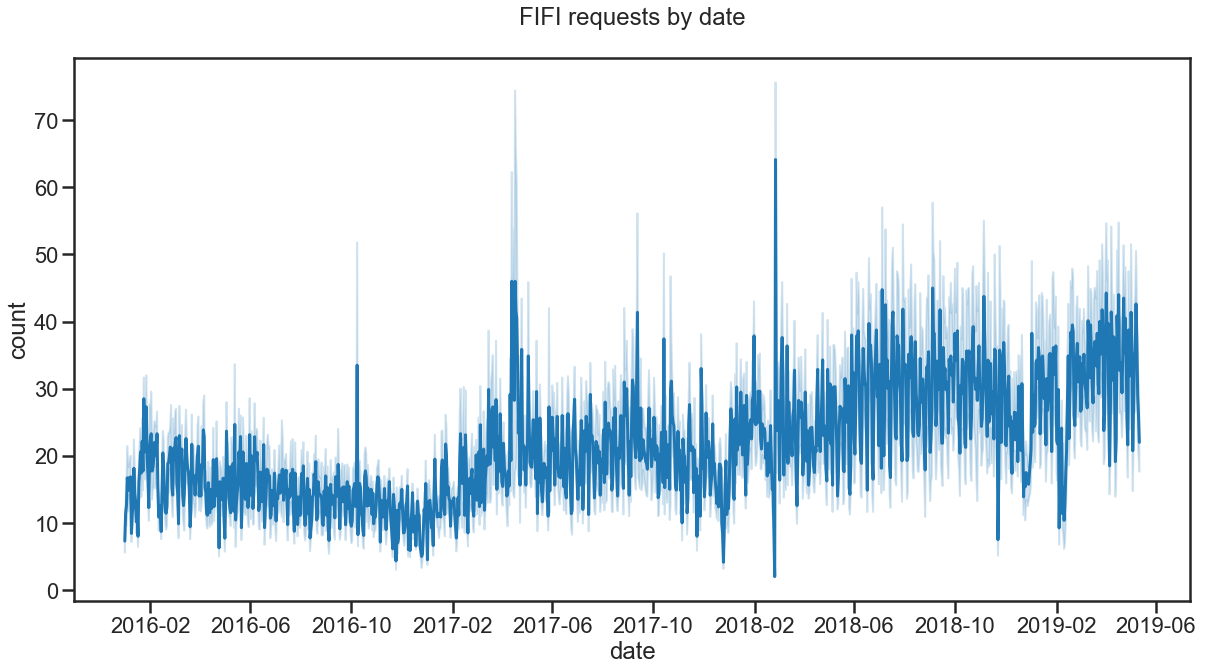

In [80]:
#create and viz number of FIFI requests by date
date_count = data.groupby(['date'])['FIFI_category'].count().reset_index(name='count')

plt.figure(figsize=(20,10))
g = sns.lineplot(x='date', data=month_cat_count, y='count', ci=68)

plt.title('FIFI requests by date', y=1.05)

Text(0.5,1.05,'FIFI requests by date and category')

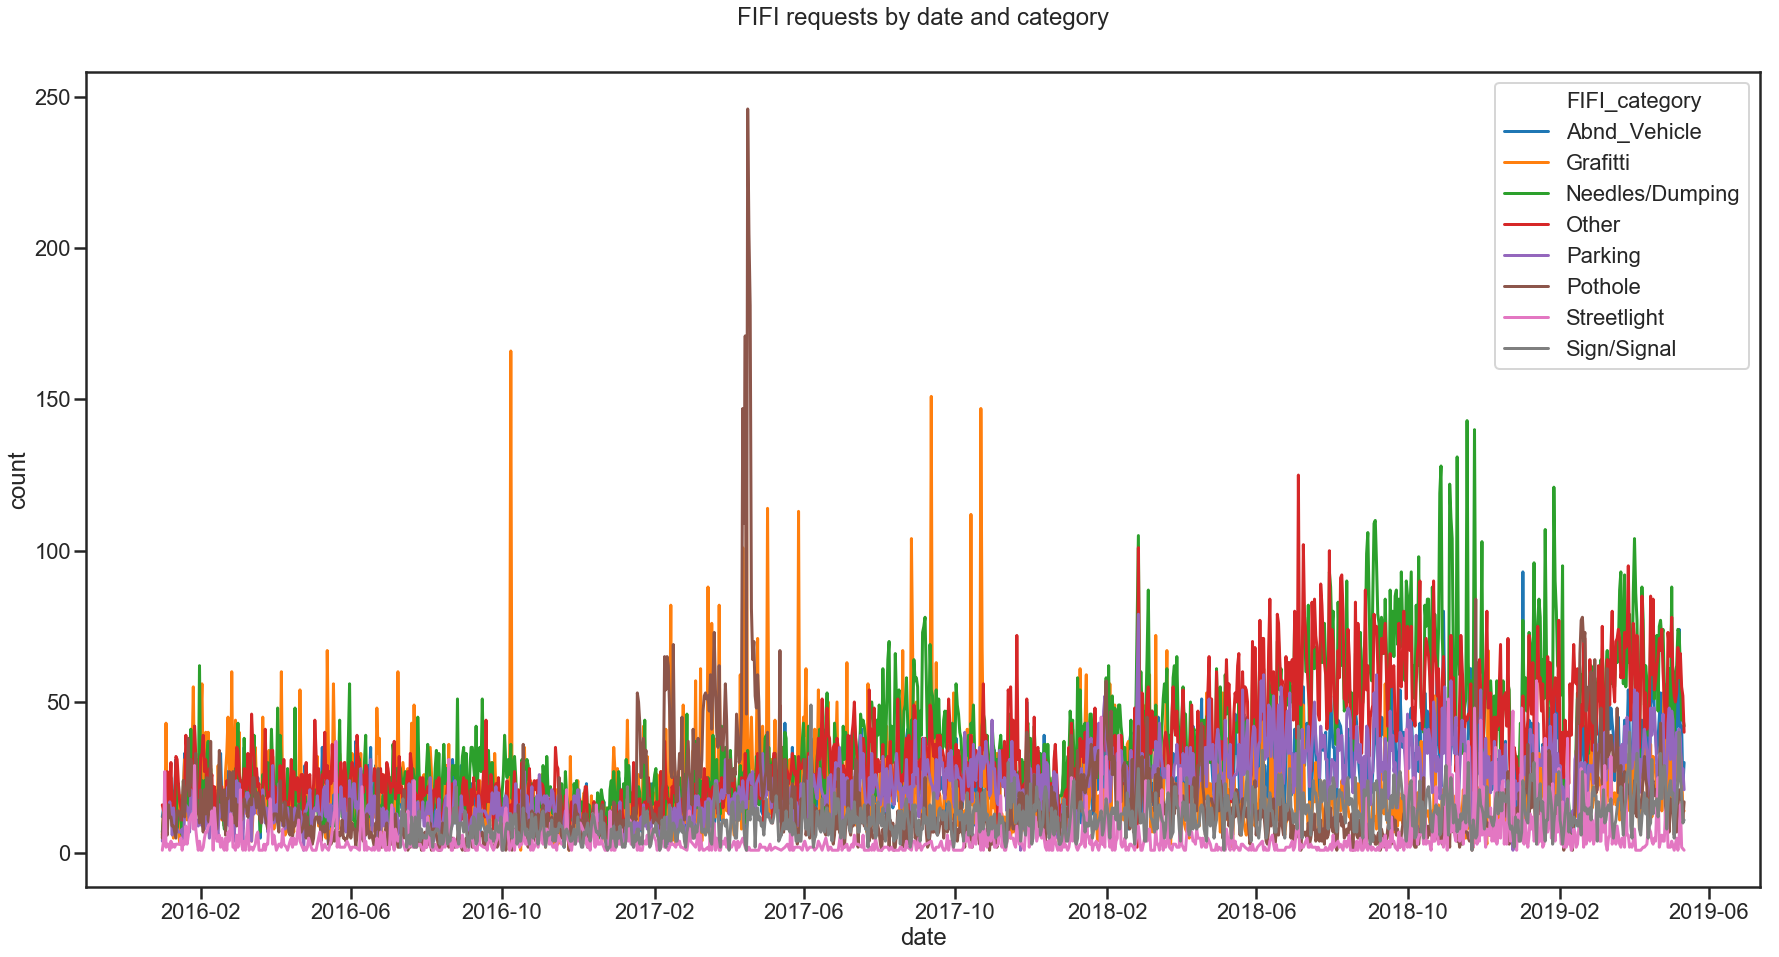

In [107]:
#create and viz number of FIFI requests by date and category
date_cat_count = data.groupby(['date', 'FIFI_category'])['FIFI_category'].count().reset_index(name='count')

plt.figure(figsize=(30,15))
sns.lineplot(x='date', y='count', data=date_cat_count, hue='FIFI_category')
plt.title('FIFI requests by date and category', y=1.05)


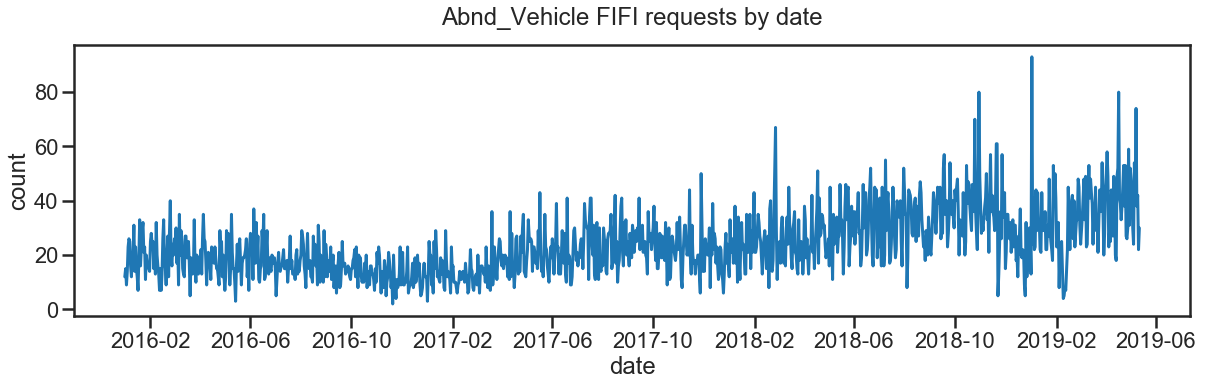

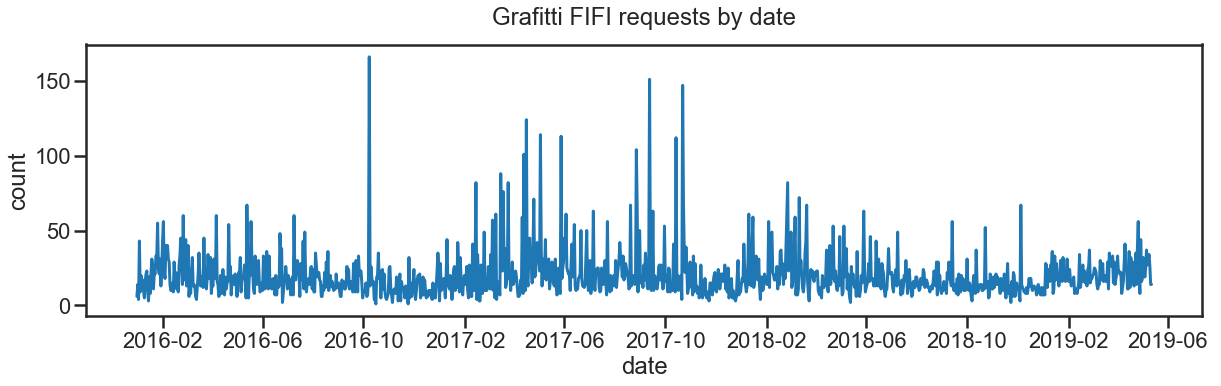

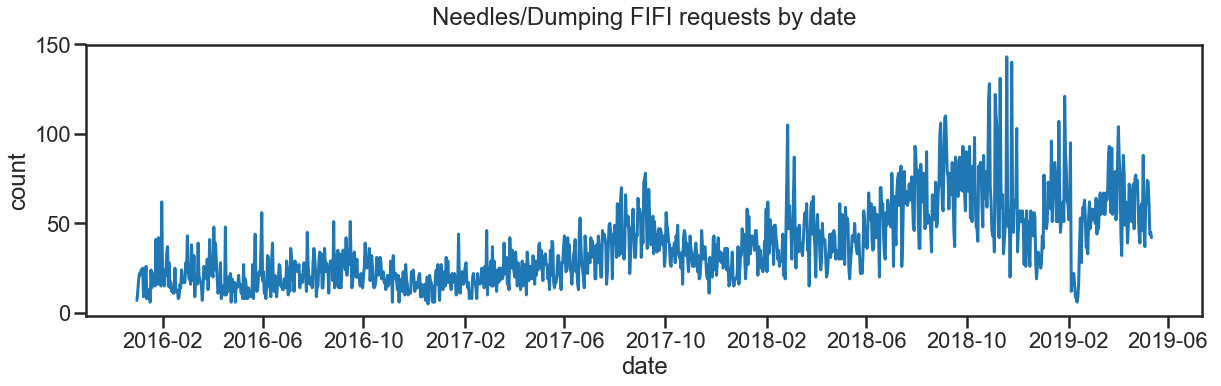

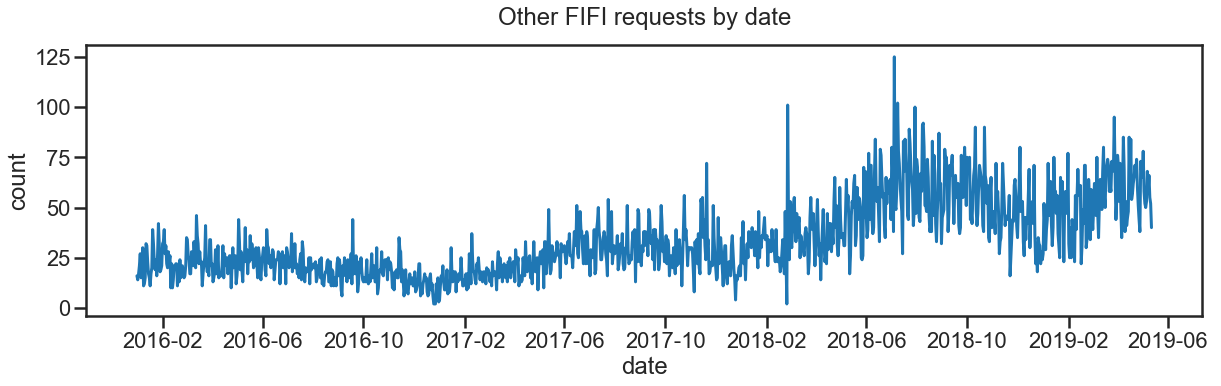

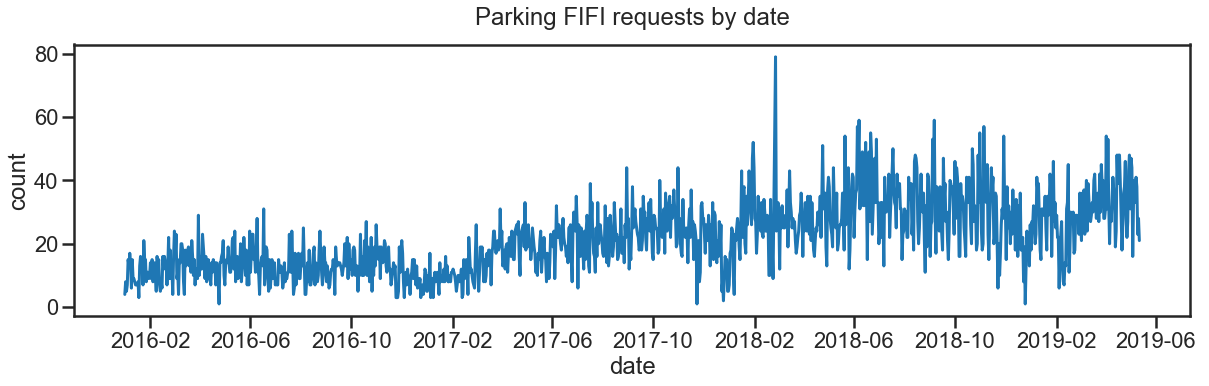

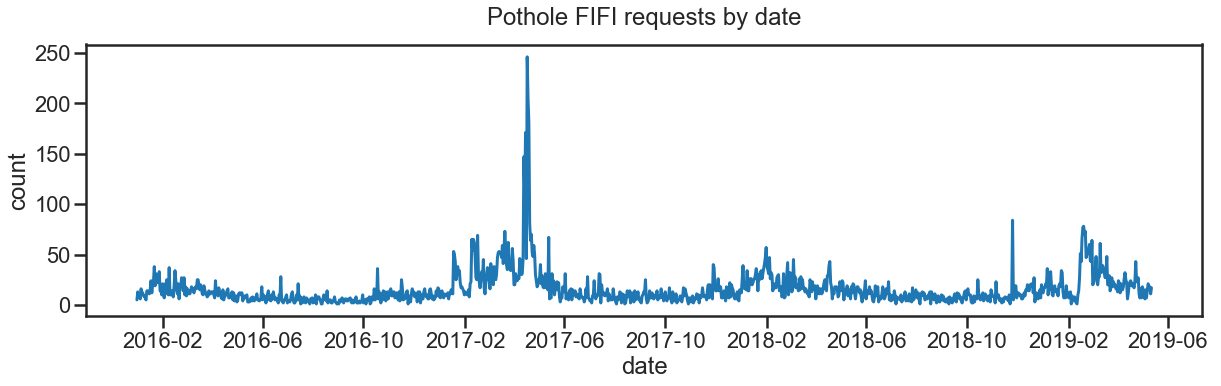

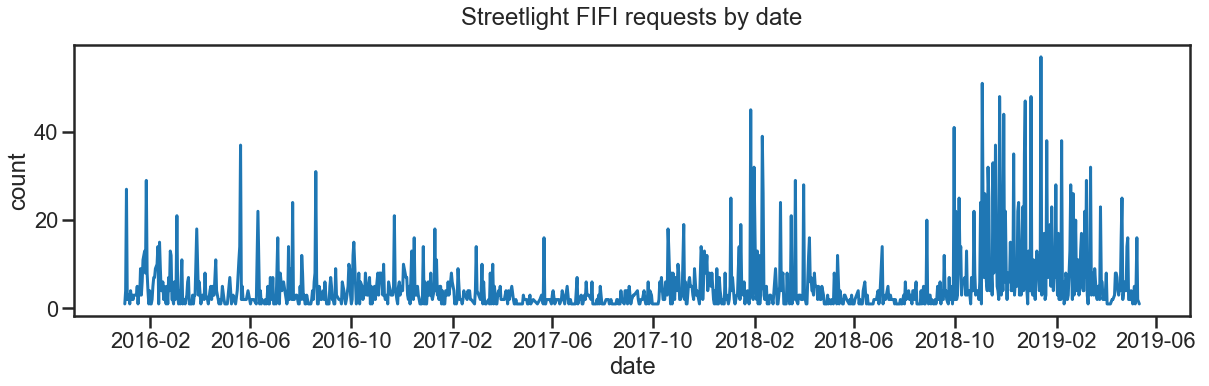

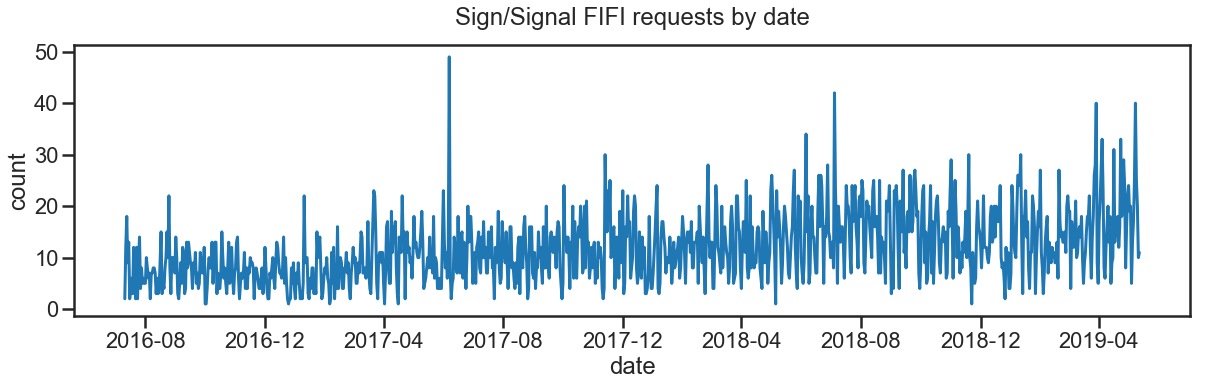

In [104]:
#create and viz number of FIFI requests by date and category
for category in date_cat_count['FIFI_category'].unique():

    graph_data = date_cat_count[date_cat_count['FIFI_category'] == category]
    
    plt.figure(figsize=(20,5))
    plt.title(category + ' FIFI requests by date', y=1.05)
    sns.lineplot(x='date', y='count', data=graph_data, ci=68)
    plt.show()

Text(0.5,1.05,'FIFI requests by date and neighborhood')

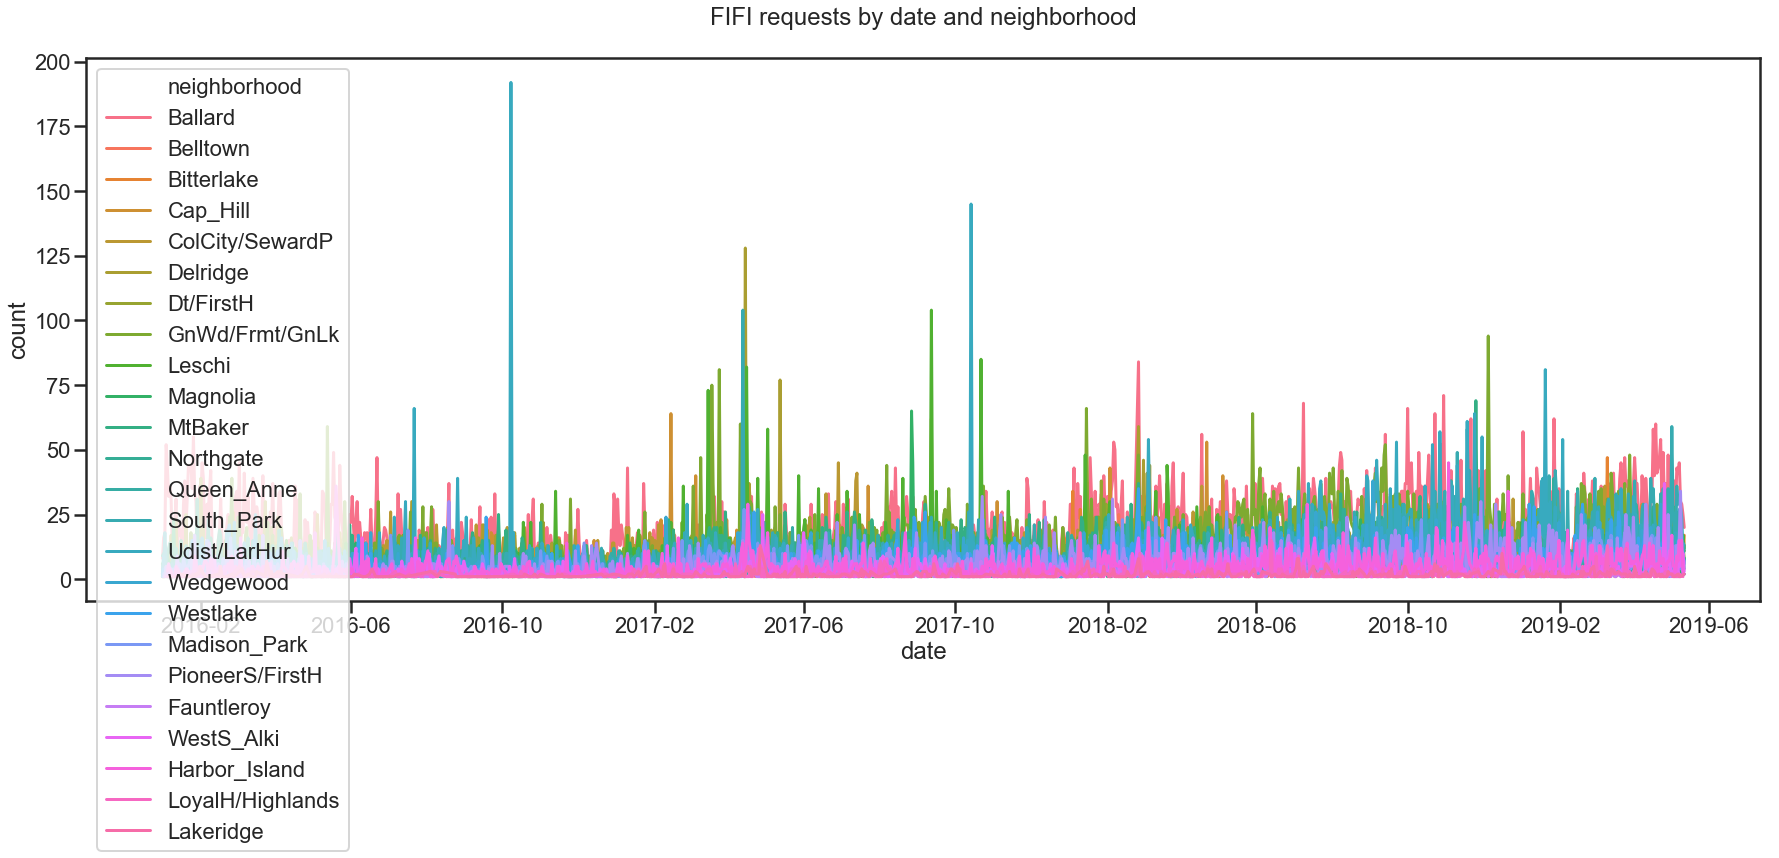

In [105]:
#create and viz number of FIFI requests by date and neighborhood
date_neigh_count = data.groupby(['date', 'neighborhood'])['FIFI_category'].count().reset_index(name='count')

plt.figure(figsize=(30,10))
sns.lineplot(x='date', y='count', data=date_neigh_count, ci=68, hue='neighborhood')

plt.title('FIFI requests by date and neighborhood', y=1.05)


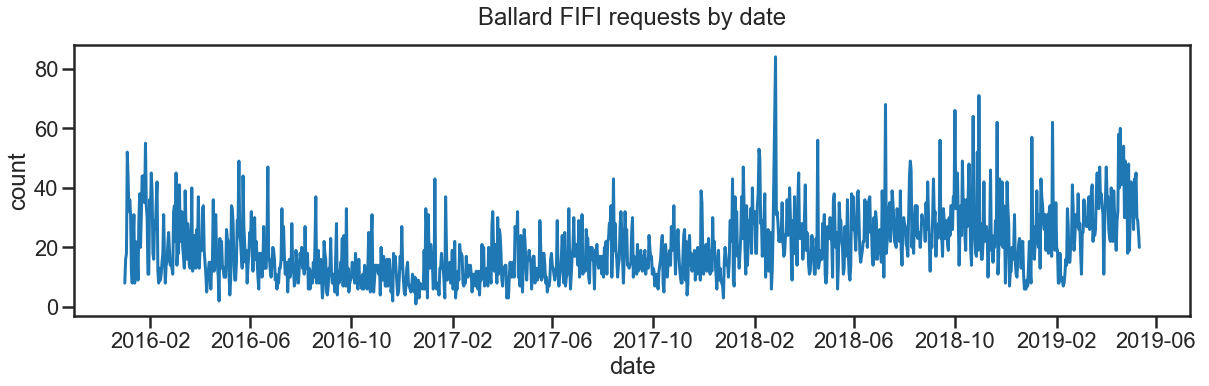

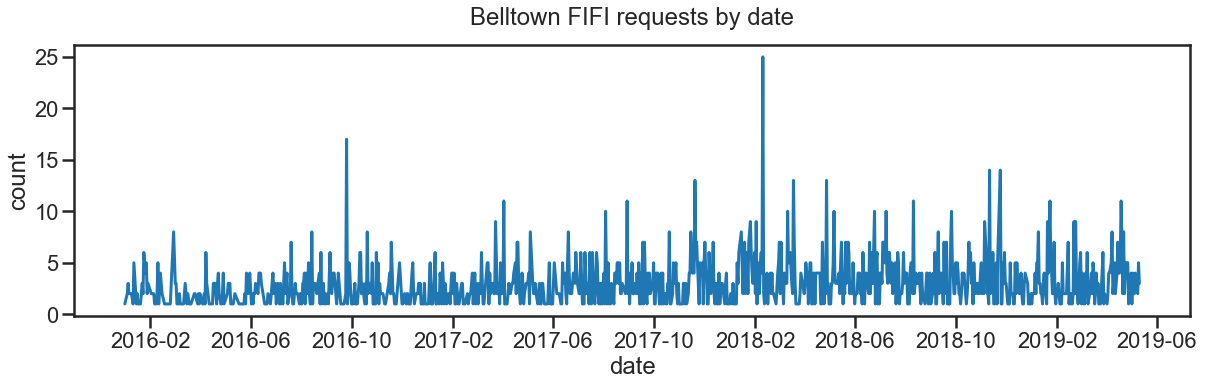

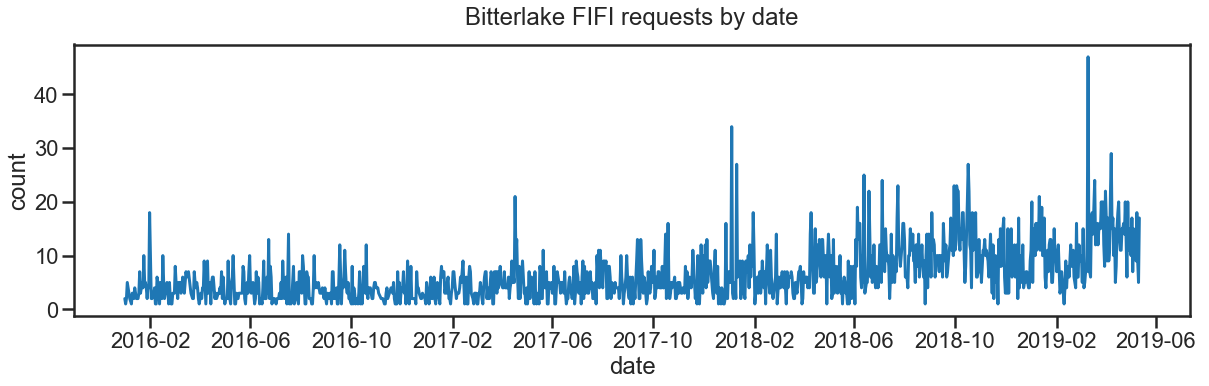

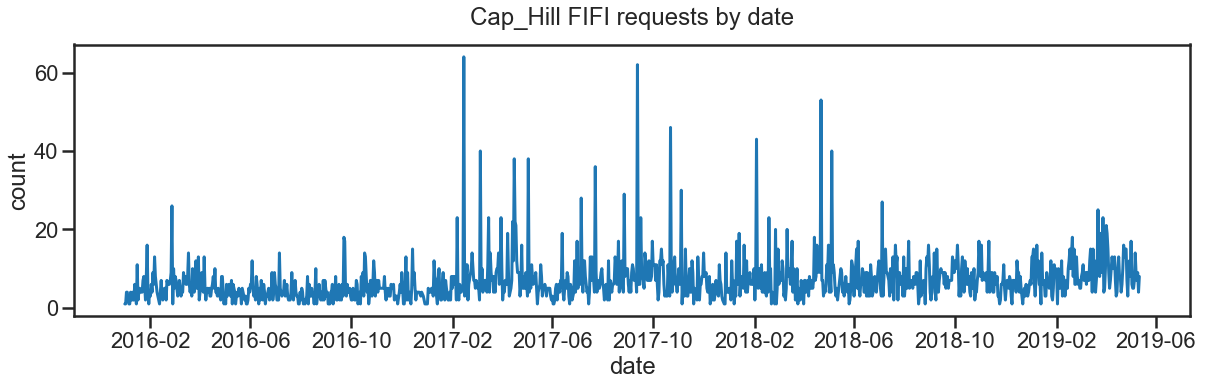

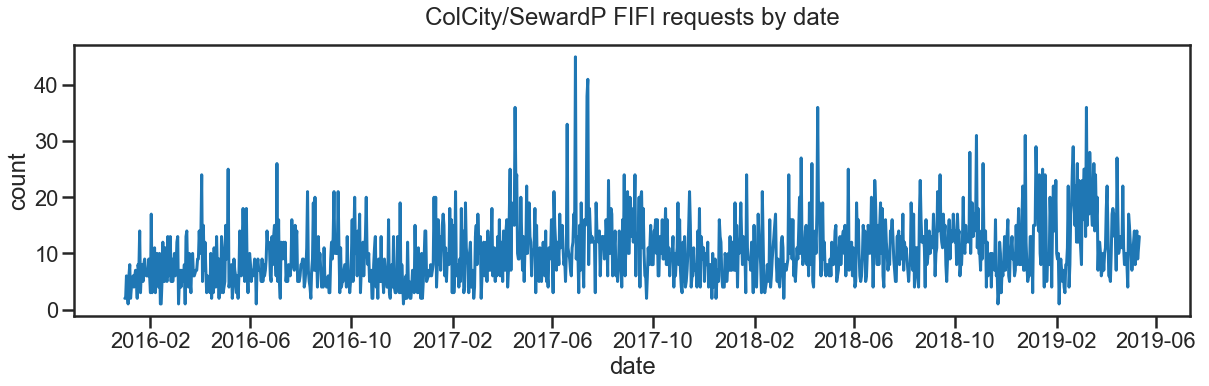

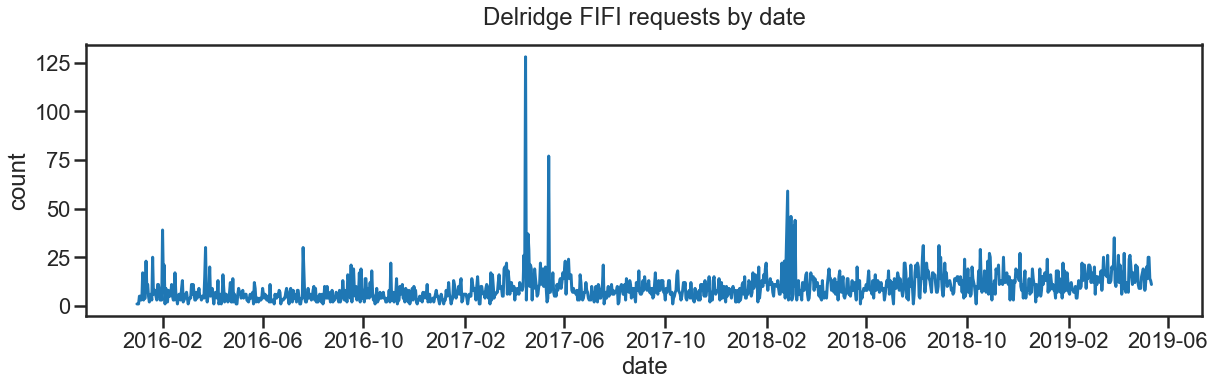

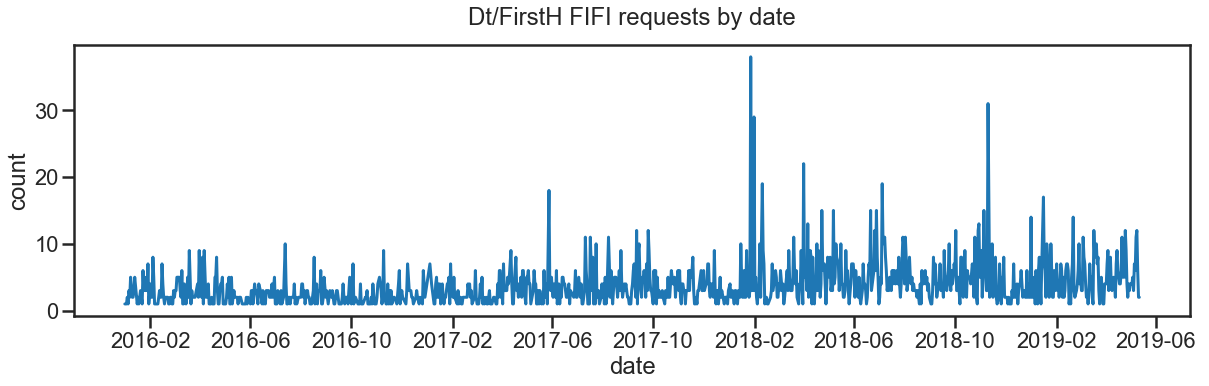

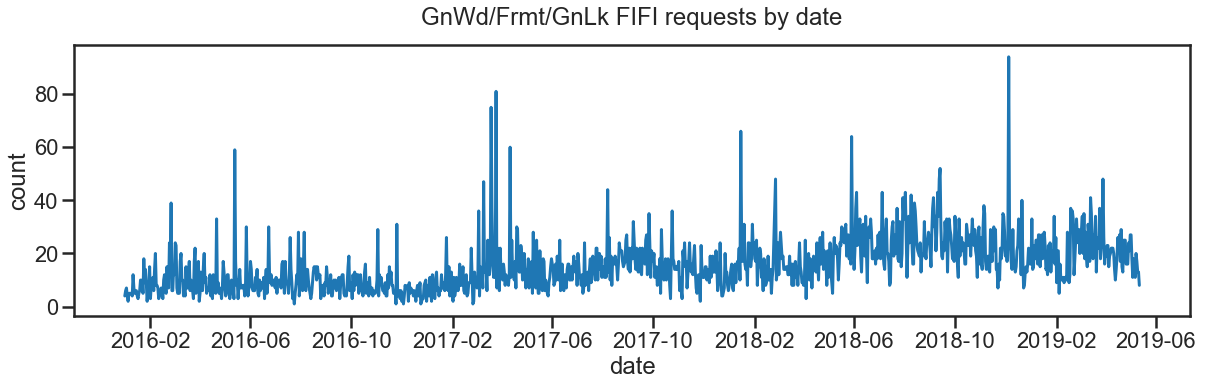

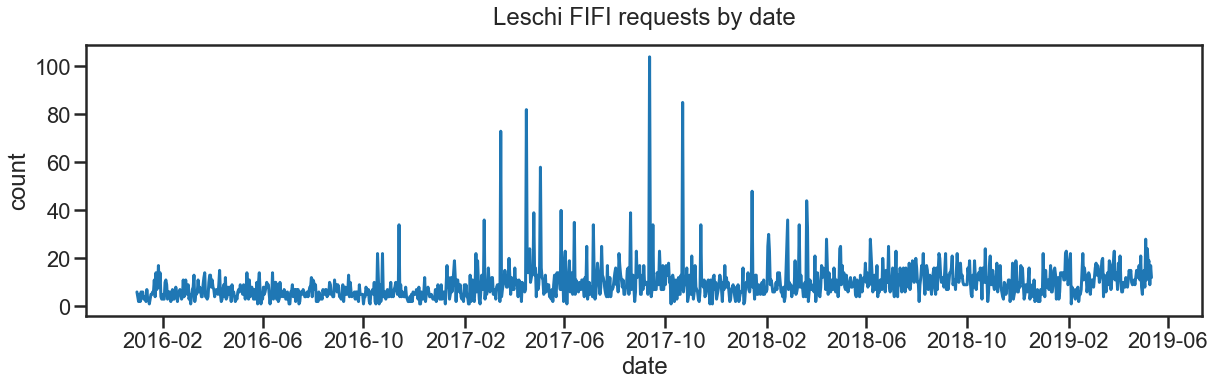

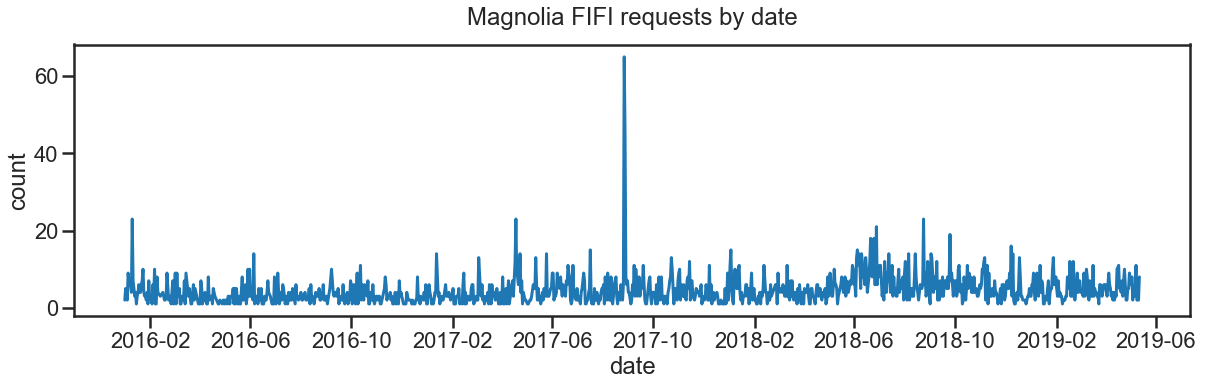

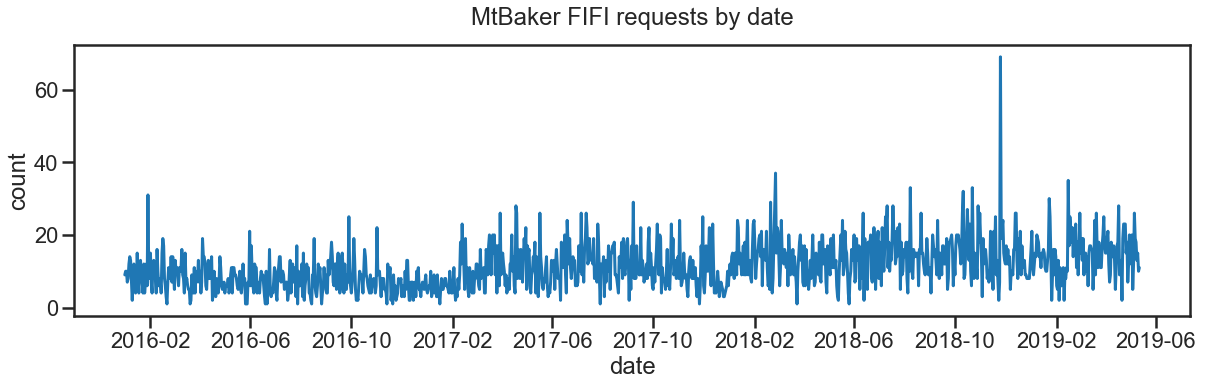

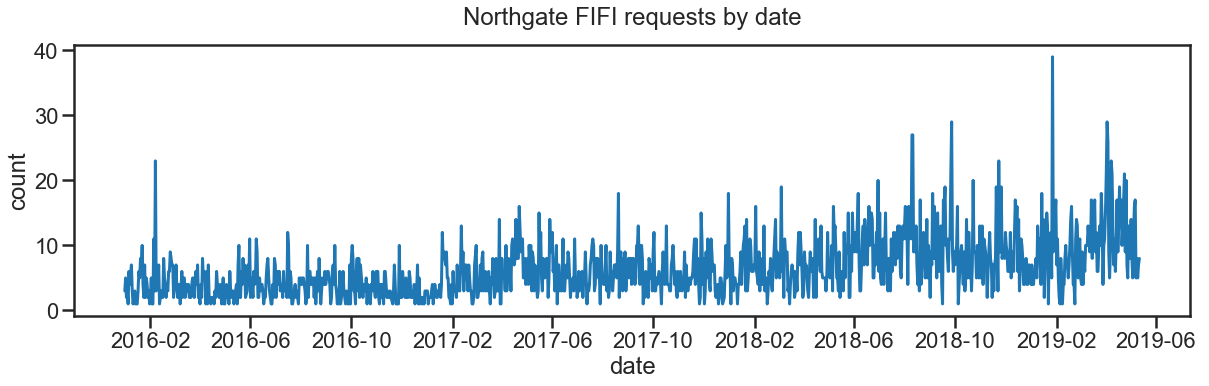

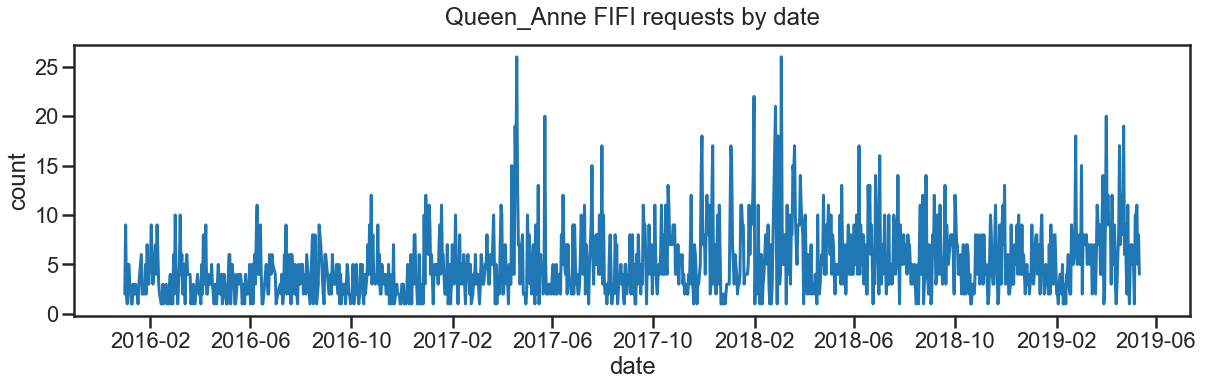

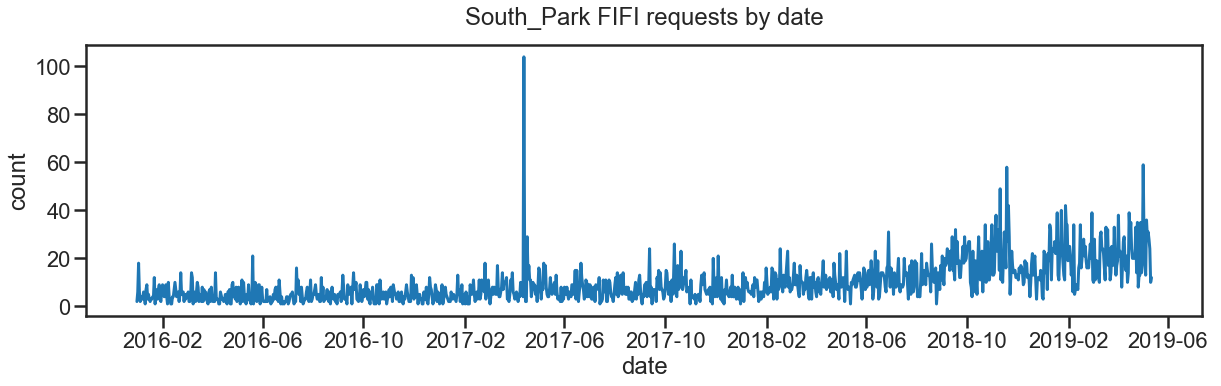

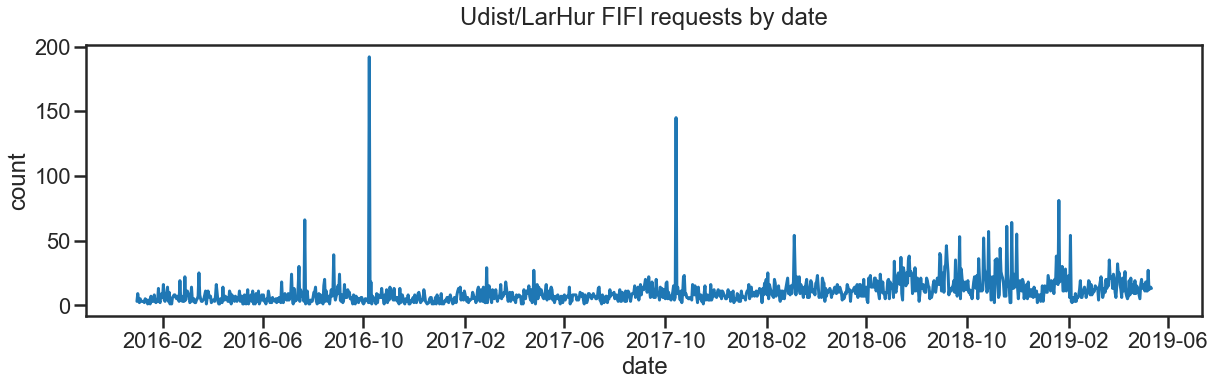

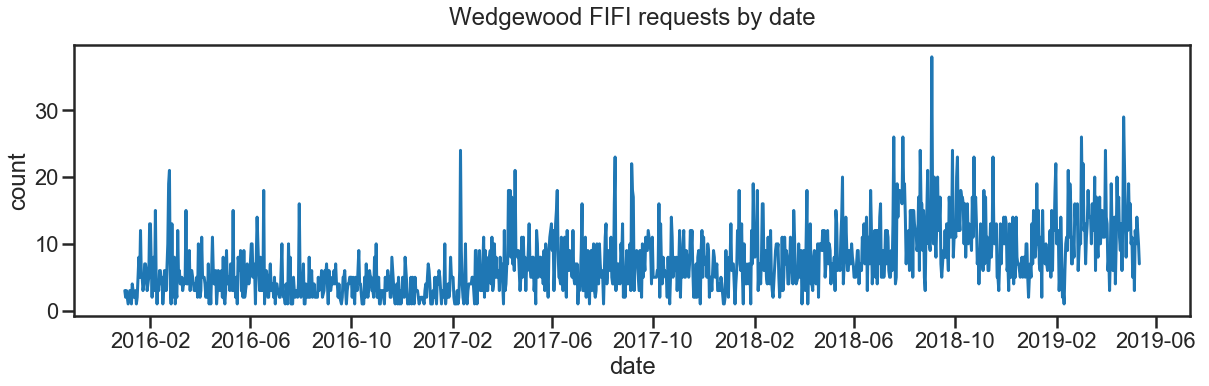

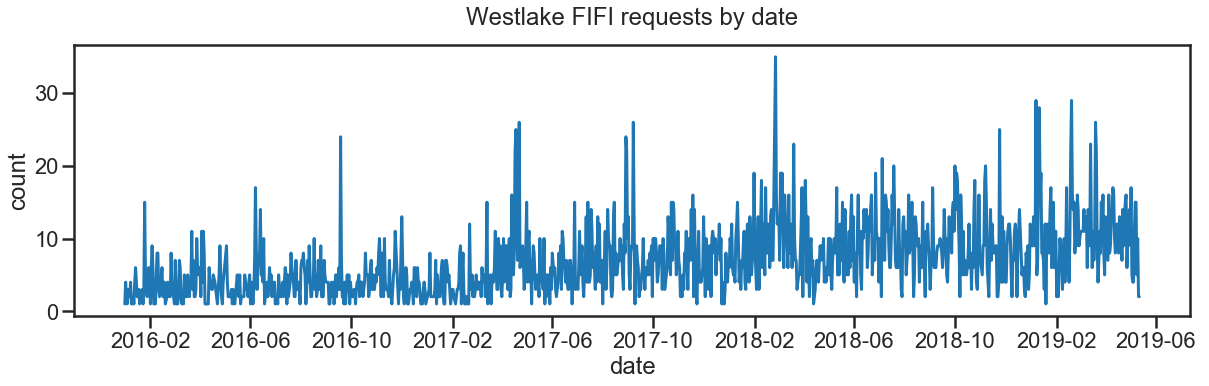

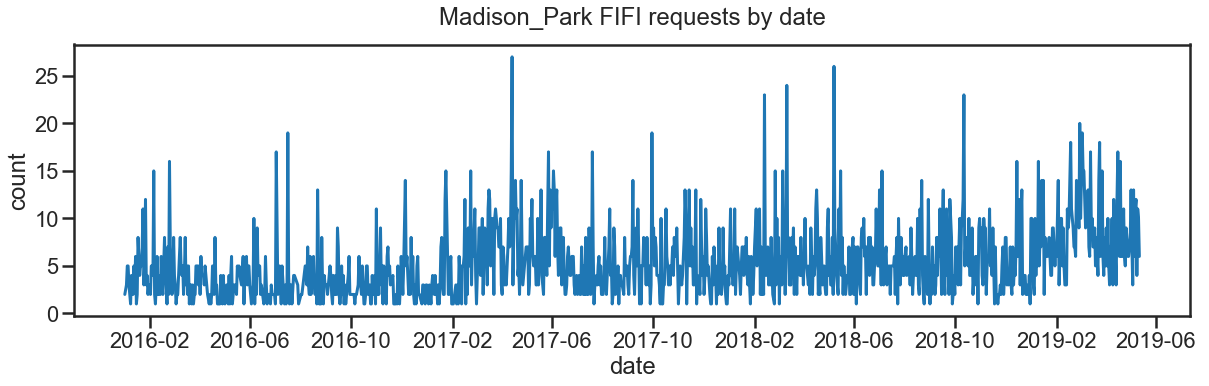

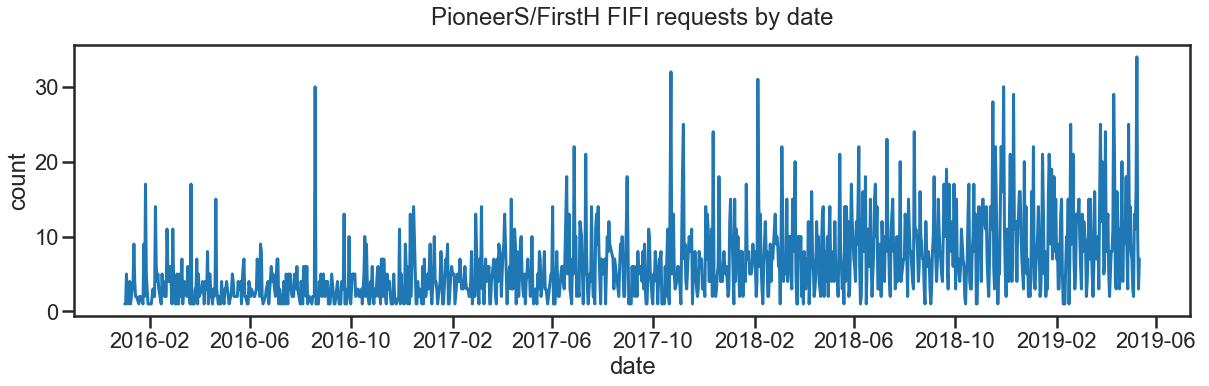

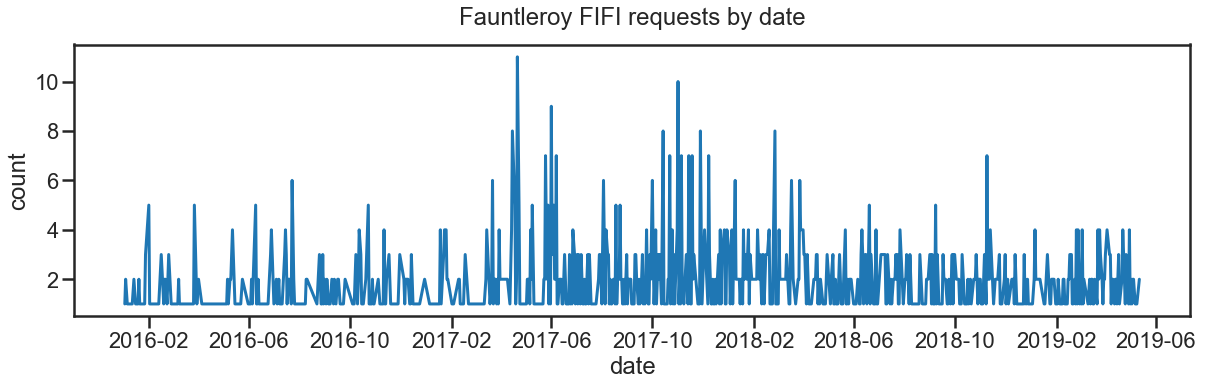

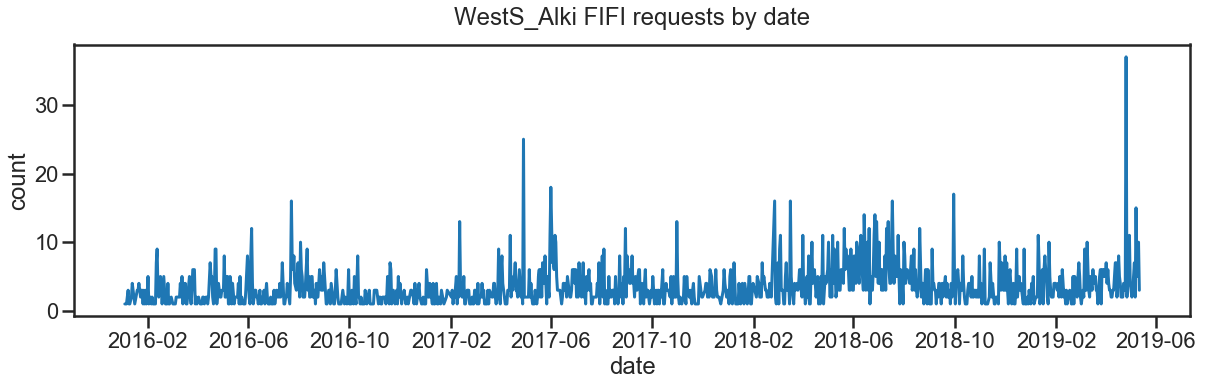

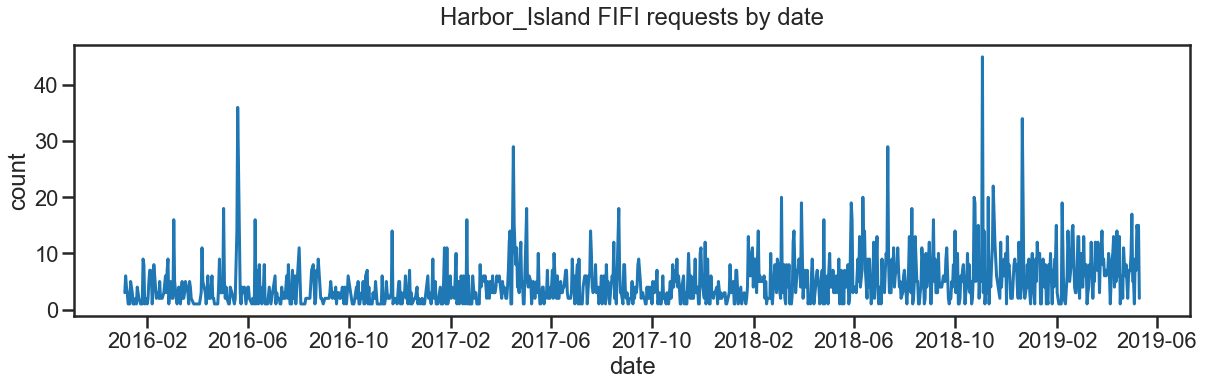

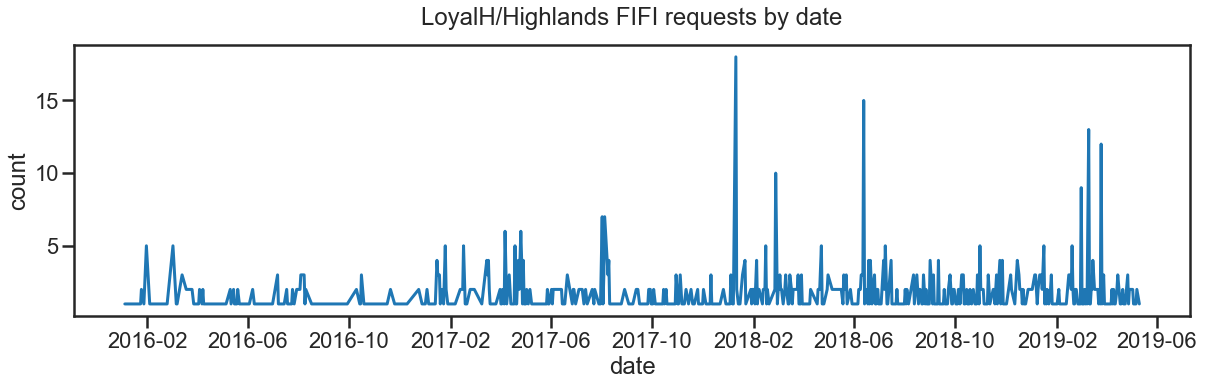

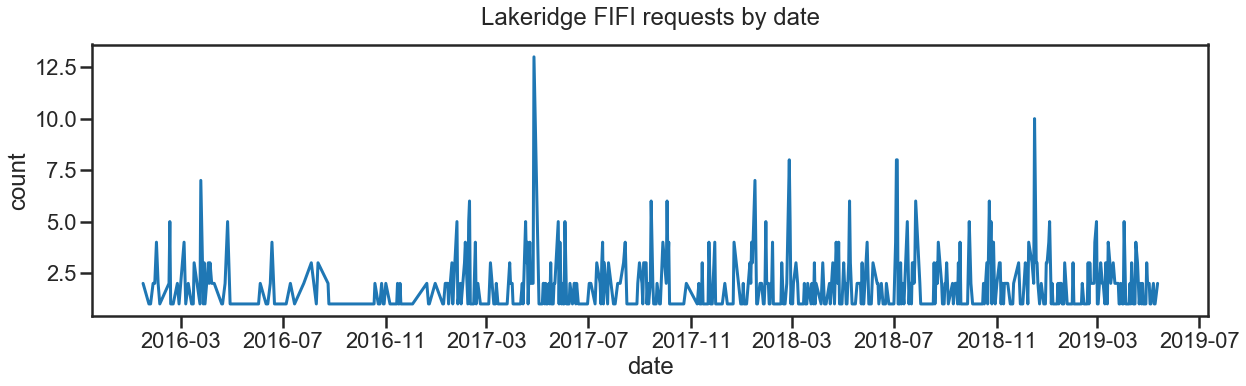

In [108]:
#create and viz number of FIFI requests by date and neighborhood
for neighborhood in date_neigh_count['neighborhood'].unique():

    graph_data = date_neigh_count[date_neigh_count['neighborhood'] == neighborhood]
    
    plt.figure(figsize=(20,5))
    plt.title(neighborhood + ' FIFI requests by date', y=1.05)
    sns.lineplot(x='date', y='count', data=graph_data, ci=68)
    plt.show()

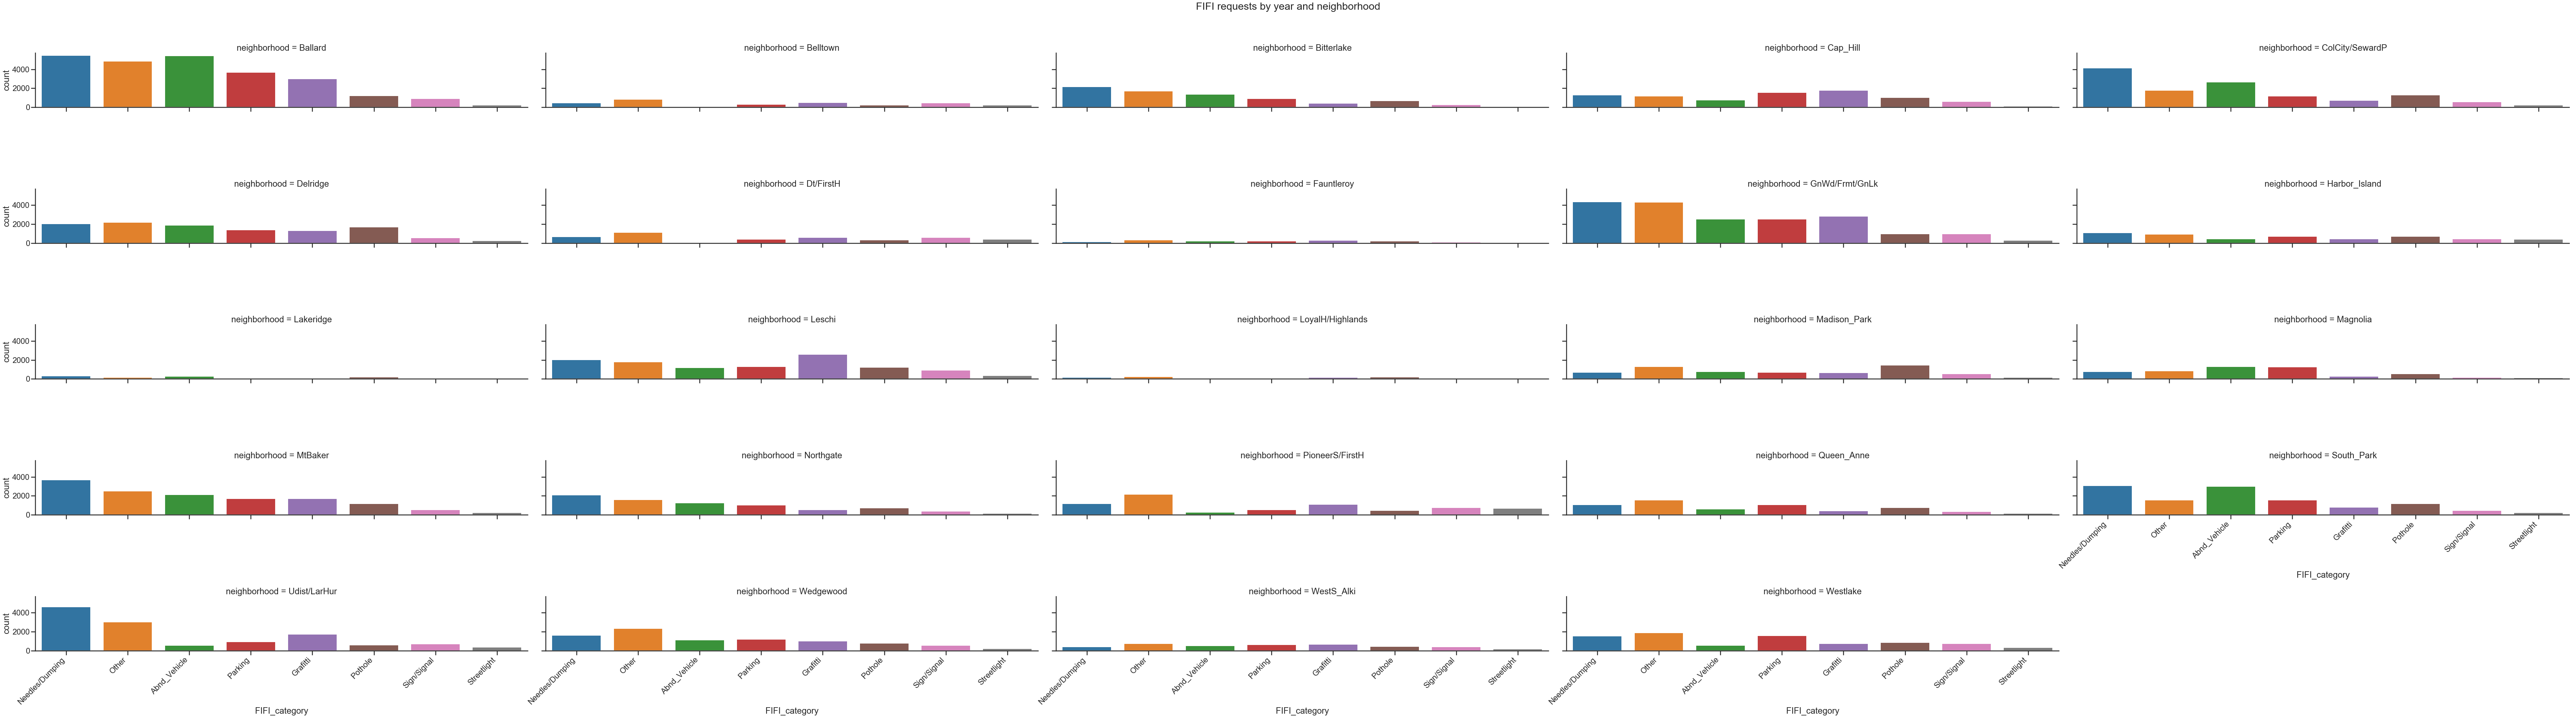

In [111]:
#create and viz number of FIFI requests by neighborhood and category
cat_neigh_count = data.groupby(['FIFI_category', 'neighborhood'])['FIFI_category'].count().reset_index(name='count')

g = sns.catplot(x='FIFI_category', data=cat_neigh_count, y='count', kind='bar', ci=68, height=5, aspect=4, \
                col='neighborhood', col_wrap=5, sharey=True, order=cat_order)
g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle('FIFI requests by year and neighborhood', y=1.05)
plt.subplots_adjust(hspace = 1.5)

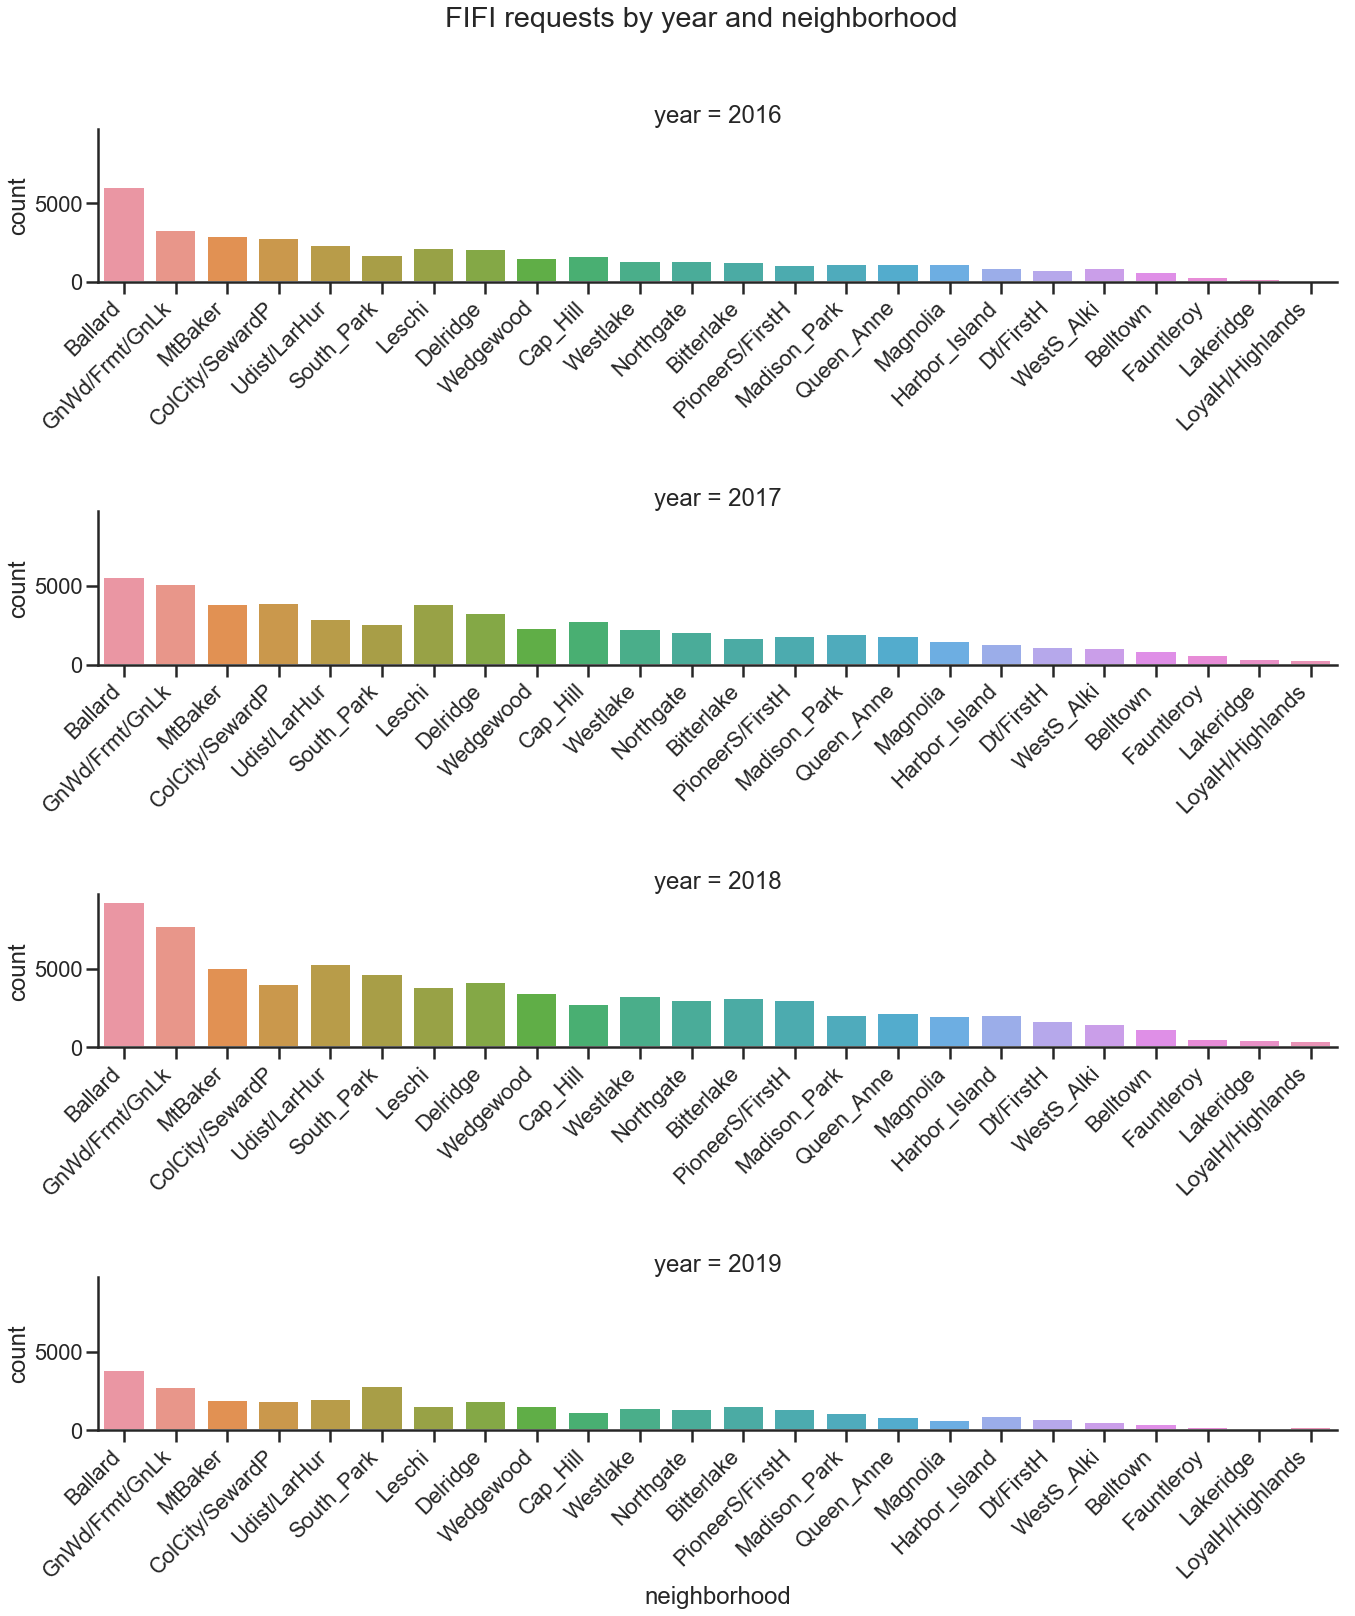

In [114]:
#create and viz number of FIFI requests by neighborhood and year
year_neigh_count = data.groupby(['year', 'neighborhood'])['FIFI_category'].count().reset_index(name='count').sort_values('count', ascending=False)

g = sns.catplot(x='neighborhood', data=year_neigh_count, y='count', kind='bar', ci=68, height=5, aspect=4, \
                col='year', col_wrap=1, sharex=False, order=neigh_order)
g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle('FIFI requests by year and neighborhood', y=1.05)
plt.subplots_adjust(hspace = 1.5)

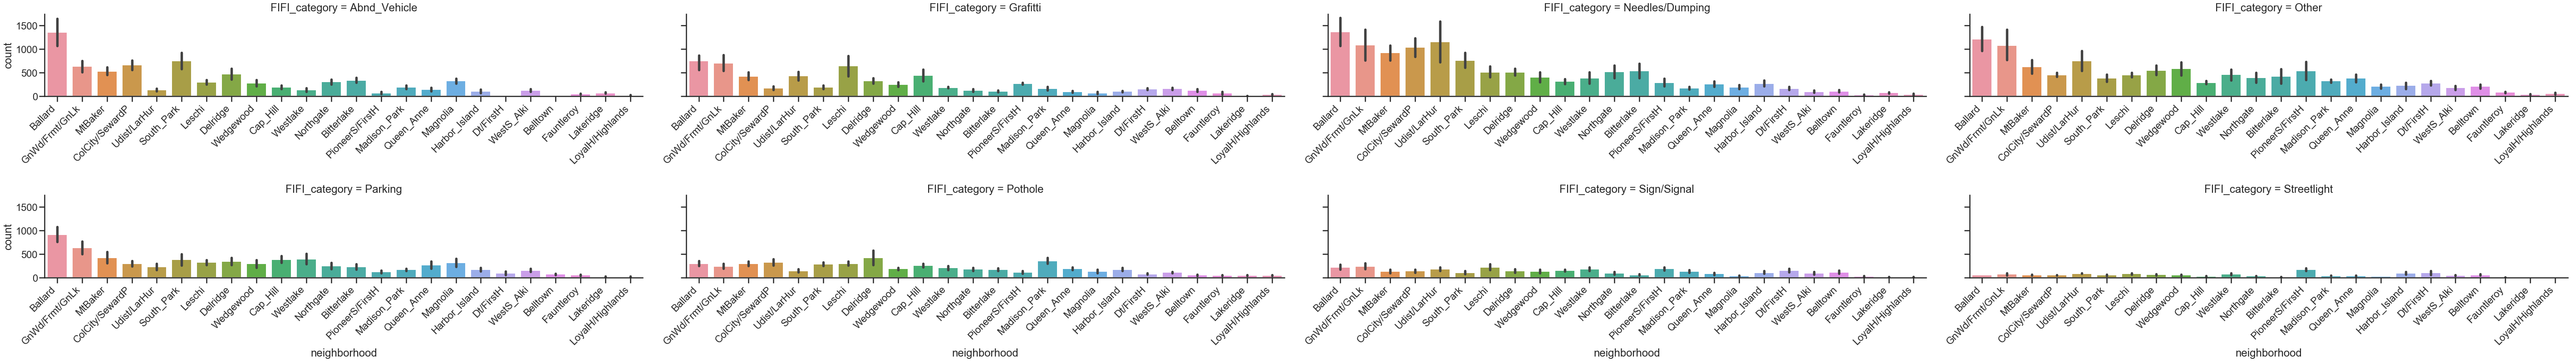

In [116]:
#create and viz number of FIFI requests by year, neighborhood, and category
year_neigh_cat_count = data.groupby(['year', 'neighborhood', 'FIFI_category'])['FIFI_category'].count().reset_index(name='count')

g = sns.catplot(x='neighborhood', data=year_neigh_cat_count, y='count', kind='bar', ci=68, height=5, aspect=4, \
                col='FIFI_category', col_wrap=4, sharey=True, sharex=False, order=neigh_order)
g.set_xticklabels(rotation=45, ha='right')
plt.subplots_adjust(hspace = 1.2)